# Get all the necessary materials

In [11]:
import openmc
import numpy as np
import math
import matplotlib.pyplot as plt

# Materials definitions

# Water
water = openmc.Material(name='Water')
water.set_density('g/cm3', 1.0)
water.add_element('H', 2.0)
water.add_element('O', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')


# 20% enriched uranium zirconium hydride fuel
uzrh = openmc.Material(name='UZrH')
uzrh.set_density('g/cm3', 6.128)
uzrh.add_nuclide('U235', 0.02344, 'wo')
uzrh.add_nuclide('U238', 0.09651, 'wo')
uzrh.add_element('H',    0.03000, 'wo')
uzrh.add_element('Zr',   0.85000, 'wo')

molybdenum = openmc.Material(name='Molybdenum')
molybdenum.add_element('Mo', 1.0)
molybdenum.set_density('g/cm3', 10.22)

graphite = openmc.Material(name='Graphite')
graphite.set_density('g/cm3', 1.70)
graphite.add_element('C', 1.0)
graphite.add_s_alpha_beta('c_Graphite')

# Stainless steel
ss304 = openmc.Material(name='Stainless Steel 304')
ss304.set_density('g/cm3', 8.0)
ss304.add_element('C',.002,'wo')
ss304.add_element('Si',.004,'wo')
ss304.add_element('P',.0003,'wo')
ss304.add_element('S',.0002,'wo')
ss304.add_element('V',.003,'wo')
ss304.add_element('Cr',.115,'wo')
ss304.add_element('Mn',.006,'wo')
ss304.add_element('Fe',.8495,'wo')
ss304.add_element('Ni',.005,'wo')
ss304.add_element('Mo',.01,'wo')
ss304.add_element('W',.005,'wo')

# Boron carbide
b4c = openmc.Material(name='Boron Carbide')
b4c.set_density('g/cm3', 2.52)
b4c.add_element('B', 4)
b4c.add_element('C', 1)

zirconium = openmc.Material(name='Zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.506)

Air = openmc.Material(name='Air')
Air.set_density('g/cm3', 0.001205)
Air.add_element('N', 0.755268, 'wo')
Air.add_element('C', 0.000124, 'wo')
Air.add_element('O', 0.231781, 'wo')
Air.add_element('Ar', 0.012827, 'wo')

aluminum = openmc.Material(name='Aluminum')
aluminum.add_element('Al', 1.0)
aluminum.set_density('g/cm3', 2.6)

# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([aluminum, zirconium, b4c, ss304, graphite, molybdenum, uzrh, water, Air])
materials_file.export_to_xml()

# Create the fuel elements for the TRIGA

In [12]:
# Geometry definitions for the fuel rod

rod_outer_radius = openmc.ZCylinder(r=0.635)
uzrh_outer_radius = openmc.ZCylinder(r=3.6449)
molybdenum_outer_radius = openmc.ZCylinder(r=3.6449)
graphite_outer_radius = openmc.ZCylinder(r=3.6449)
ss304_outer_radius = openmc.ZCylinder(r=3.6449)
clad_outer_radius = openmc.ZCylinder(r=3.75412)

empty_space_min = openmc.ZPlane(z0=-114.3)
empty_space_max = openmc.ZPlane(z0=-55.079265)
rod_min = openmc.ZPlane(z0=-55.079265)
rod_max = openmc.ZPlane(z0=-16.979265)
uzrh_min = openmc.ZPlane(z0=-55.079265)
uzrh_max = openmc.ZPlane(z0=-16.979265)
molybdenum_min = openmc.ZPlane(z0=-55.15864)
molybdenum_max = openmc.ZPlane(z0=-55.079265)
graphite_upper_min = openmc.ZPlane(z0=-16.979265)
graphite_upper_max = openmc.ZPlane(z0=-10.375265)
graphite_lower_min = openmc.ZPlane(z0=-64.621664)
graphite_lower_max = openmc.ZPlane(z0=-55.15864)
ss304_upper_min = openmc.ZPlane(z0=-10.375265)
ss304_upper_max = openmc.ZPlane(z0=+0)
ss304_lower_min = openmc.ZPlane(z0=-72.0598)
ss304_lower_max = openmc.ZPlane(z0=-64.621664)
clad_min = openmc.ZPlane(z0=-72.0598)
clad_max = openmc.ZPlane(z0=0)

# Create a Universe to encapsulate the fuel rod
fuel_universe = openmc.Universe(name='UZrH Fuel Universe')

# Create rod cell
rod_cell = openmc.Cell(name='Zr Rod')
rod_cell.fill = zirconium
rod_cell.region = -rod_outer_radius & +rod_min & -rod_max
fuel_universe.add_cell(rod_cell)

# Create uzrh cell
uzrh_cell = openmc.Cell(name='UZrH')
uzrh_cell.fill = uzrh
uzrh_cell.region = +rod_outer_radius & -uzrh_outer_radius & +uzrh_min & -uzrh_max
fuel_universe.add_cell(uzrh_cell)

# Create molybdenum disk
molybdenum_cell = openmc.Cell(name='Molybdenum')
molybdenum_cell.fill = molybdenum
molybdenum_cell.region = -molybdenum_outer_radius & +molybdenum_min & -molybdenum_max
fuel_universe.add_cell(molybdenum_cell)

# Create upper graphite cell
graphite_upper_cell = openmc.Cell(name='Upper Graphite')
graphite_upper_cell.fill = graphite
graphite_upper_cell.region = -graphite_outer_radius & +graphite_upper_min & -graphite_upper_max
fuel_universe.add_cell(graphite_upper_cell)

# Create lower graphite cell
graphite_lower_cell = openmc.Cell(name='Lower Graphite')
graphite_lower_cell.fill = graphite
graphite_lower_cell.region = -graphite_outer_radius & +graphite_lower_min & -graphite_lower_max
fuel_universe.add_cell(graphite_lower_cell)

# Create upper ss304 cell
ss304_upper_cell = openmc.Cell(name='Upper Stainless Steel 304')
ss304_upper_cell.fill = ss304
ss304_upper_cell.region = -ss304_outer_radius & +ss304_upper_min & -ss304_upper_max 
fuel_universe.add_cell(ss304_upper_cell)

# Create lower ss304 cell
ss304_lower_cell = openmc.Cell(name='Lower Stainless Steel 304')
ss304_lower_cell.fill = ss304
ss304_lower_cell.region = -ss304_outer_radius & +ss304_lower_min & -ss304_lower_max
fuel_universe.add_cell(ss304_lower_cell)

# Create clad cell
clad_cell = openmc.Cell(name='Stainless Steel 304 Cladding')
clad_cell.fill = ss304
clad_cell.region = -clad_outer_radius & +ss304_outer_radius & +clad_min & -clad_max
fuel_universe.add_cell(clad_cell)

# Create empty space cell
empty_space_cell = openmc.Cell(name='Empty space before fuel rod')
empty_space_cell.fill = water
empty_space_cell.region = -clad_outer_radius & +empty_space_min & -empty_space_max
fuel_universe.add_cell(empty_space_cell)

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

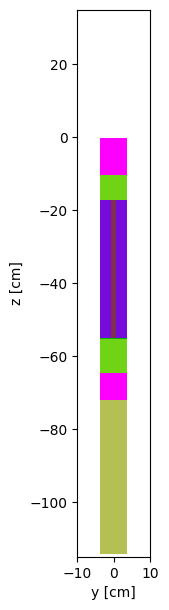

In [13]:
# Plotting fuel rod

fuel_universe.plot(width=(20, 150), origin=[0,0,-40], basis='yz', color_by='material', colors={ss304:'fuchsia'})

# Create Transient Rod

In [14]:
# Geometry definitions for the transient rod

Air_outer_radius = openmc.ZCylinder(r=3.03276)
b4c_outer_radius = openmc.ZCylinder(r=3.03276)
clad_outer_radius = openmc.ZCylinder(r=3.38455)
aluminum_outer_radius = openmc.ZCylinder(r=3.03276)

aluminum_1_min = openmc.ZPlane(z0=-114.3)
aluminum_1_max = openmc.ZPlane(z0=-113.03)
Air_1_min = openmc.ZPlane(z0=-113.03)
Air_1_max = openmc.ZPlane(z0=-57.785)
aluminum_2_min = openmc.ZPlane(z0=-57.785)
aluminum_2_max = openmc.ZPlane(z0=-56.515)
b4c_min = openmc.ZPlane(z0=-56.515)
b4c_max = openmc.ZPlane(z0=-18.415)
Air_2_min = openmc.ZPlane(z0=-18.415)
Air_2_max = openmc.ZPlane(z0=-18.0975)
aluminum_3_min = openmc.ZPlane(z0=-18.0975)
aluminum_3_max = openmc.ZPlane(z0=-16.8275)
Air_3_min = openmc.ZPlane(z0=-16.8275)
Air_3_max = openmc.ZPlane(z0=-7.3025)
aluminum_4_min = openmc.ZPlane(z0=-7.3025)
aluminum_4_max = openmc.ZPlane(z0=0)
clad_min = openmc.ZPlane(z0=-114.3)
clad_max = openmc.ZPlane(z0=0)

# Create a Universe to encapsulate the transient rod
transient_universe = openmc.Universe(name='Transient Universe')

# Create Air 1 cell
Air_1_cell = openmc.Cell(name= 'Air 1')
Air_1_cell.fill = Air
Air_1_cell.region = -Air_outer_radius & +Air_1_min & -Air_1_max
transient_universe.add_cell(Air_1_cell)

# Create Air 2 cell
Air_2_cell = openmc.Cell(name= 'Air 2')
Air_2_cell.fill = Air
Air_2_cell.region = -Air_outer_radius & +Air_2_min & -Air_2_max 
transient_universe.add_cell(Air_2_cell)

# Create Air 3 cell
Air_3_cell = openmc.Cell(name= 'Air 3')
Air_3_cell.fill = Air
Air_3_cell.region = -Air_outer_radius & +Air_3_min & -Air_3_max 
transient_universe.add_cell(Air_3_cell)

# Create b4c cell
b4c_cell = openmc.Cell(name='Boron Carbide')
b4c_cell.fill = b4c
b4c_cell.region = -b4c_outer_radius & -b4c_max & +b4c_min
transient_universe.add_cell(b4c_cell)

# Create aluminum 1 cell
aluminum_1_cell = openmc.Cell(name='Aluminum')
aluminum_1_cell.fill = aluminum
aluminum_1_cell.region = -aluminum_outer_radius & +aluminum_1_min & -aluminum_1_max 
transient_universe.add_cell(aluminum_1_cell)

# Create aluminum 2 cell
aluminum_2_cell = openmc.Cell(name='Aluminum')
aluminum_2_cell.fill = aluminum
aluminum_2_cell.region = -aluminum_outer_radius & +aluminum_2_min & -aluminum_2_max
transient_universe.add_cell(aluminum_2_cell)

# Create aluminum 3 cell
aluminum_3_cell = openmc.Cell(name='Aluminum')
aluminum_3_cell.fill = aluminum
aluminum_3_cell.region = -aluminum_outer_radius & +aluminum_3_min & -aluminum_3_max 
transient_universe.add_cell(aluminum_3_cell)

# Create aluminum 4 cell
aluminum_4_cell = openmc.Cell(name='Aluminum')
aluminum_4_cell.fill = aluminum
aluminum_4_cell.region = -aluminum_outer_radius & +aluminum_4_min & -aluminum_4_max
transient_universe.add_cell(aluminum_4_cell)

# Create a clad cell
clad_cell = openmc.Cell(name='Aluminum Cladding')
clad_cell.fill = aluminum
clad_cell.region = -clad_outer_radius & +b4c_outer_radius & +clad_min & -clad_max 
transient_universe.add_cell(clad_cell)

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

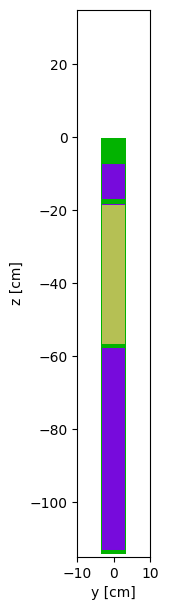

In [15]:
# Plotting transient rod

transient_universe.plot(width=(20, 150), origin=[0,0,-40], basis='yz', color_by='material', colors={water:'fuchsia'})

# Create Control Rods

In [16]:

# Geometry definitions for the control rod

rod_outer_radius = openmc.ZCylinder(r=0.635)
uzrh_outer_radius = openmc.ZCylinder(r=3.33375)
Air_outer_radius = openmc.ZCylinder(r=3.33375)
b4c_outer_radius = openmc.ZCylinder(r=3.33375)
ss304_outer_radius = openmc.ZCylinder(r=3.33375)
clad_outer_radius = openmc.ZCylinder(r=3.38455)

ss304_5_min = openmc.ZPlane(z0=-114.3)
ss304_5_max = openmc.ZPlane(z0=-113.03)
Air_4_min = openmc.ZPlane(z0=-113.03)
Air_4_max = openmc.ZPlane(z0=-99.06)
ss304_4_min = openmc.ZPlane(z0=-99.06)
ss304_4_max = openmc.ZPlane(z0=-96.52)
rod_min = openmc.ZPlane(z0=-96.52)
rod_max = openmc.ZPlane(z0=-58.42)
uzrh_min = openmc.ZPlane(z0=-96.52)
uzrh_max = openmc.ZPlane(z0=-58.42)
Air_1_min = openmc.ZPlane(z0=-58.42)
Air_1_max = openmc.ZPlane(z0=-57.785)
ss304_1_min = openmc.ZPlane(z0=-57.785)
ss304_1_max = openmc.ZPlane(z0=-56.515)
b4c_1_min = openmc.ZPlane(z0=-56.515)
b4c_1_max = openmc.ZPlane(z0=-18.415)
Air_2_min = openmc.ZPlane(z0=-18.415)
Air_2_max = openmc.ZPlane(z0=-18.0975)
ss304_2_min = openmc.ZPlane(z0=-18.0975)
ss304_2_max = openmc.ZPlane(z0=-16.8275)
Air_3_min = openmc.ZPlane(z0=-16.8275)
Air_3_max = openmc.ZPlane(z0=-7.3025)
ss304_3_min = openmc.ZPlane(z0=-7.3025)
ss304_3_max = openmc.ZPlane(z0=0.0)
clad_min = openmc.ZPlane(z0=-114.3)
clad_max = openmc.ZPlane(z0=0.0)

# Create a Universe to encapsulate the control rod
control_universe = openmc.Universe(name='Control Universe')

# Create rod cell
rod_cell = openmc.Cell(name='Zr Rod')
rod_cell.fill = zirconium
rod_cell.region = -rod_outer_radius & +rod_min & -rod_max
control_universe.add_cell(rod_cell)

# Create uzrh cell
uzrh_cell = openmc.Cell(name='UZrH')
uzrh_cell.fill = uzrh
uzrh_cell.region = +rod_outer_radius & -uzrh_outer_radius & +uzrh_min & -uzrh_max
control_universe.add_cell(uzrh_cell)

# Create Air 1 cell
Air_1_cell = openmc.Cell(name= 'Air 1')
Air_1_cell.fill = Air
Air_1_cell.region = -Air_outer_radius & +Air_1_min & -Air_1_max
control_universe.add_cell(Air_1_cell)

# Create Air 2 cell
Air_2_cell = openmc.Cell(name= 'Air 2')
Air_2_cell.fill = Air
Air_2_cell.region = -Air_outer_radius & +Air_2_min & -Air_2_max 
control_universe.add_cell(Air_2_cell)

# Create Air 3 cell
Air_3_cell = openmc.Cell(name= 'Air 3')
Air_3_cell.fill = Air
Air_3_cell.region = -Air_outer_radius & +Air_3_min & -Air_3_max 
control_universe.add_cell(Air_3_cell)

# Create Air 4 cell
Air_4_cell = openmc.Cell(name= 'Air 3')
Air_4_cell.fill = Air
Air_4_cell.region = -Air_outer_radius & +Air_4_min & -Air_4_max 
control_universe.add_cell(Air_4_cell)

# Create ss304 1 cell
ss304_1_cell = openmc.Cell(name='Stainless Steel 304 Cell 1')
ss304_1_cell.fill = ss304
ss304_1_cell.region = -ss304_outer_radius & +ss304_1_min & -ss304_1_max 
control_universe.add_cell(ss304_1_cell)

# Create ss304 2 cell
ss304_2_cell = openmc.Cell(name='Stainless Steel 304 Cell 2')
ss304_2_cell.fill = ss304
ss304_2_cell.region = -ss304_outer_radius & +ss304_2_min & -ss304_2_max 
control_universe.add_cell(ss304_2_cell)

# Create ss304 3 cell
ss304_3_cell = openmc.Cell(name='Stainless Steel 304 Cell 3')
ss304_3_cell.fill = ss304
ss304_3_cell.region = -ss304_outer_radius & +ss304_3_min & -ss304_3_max 
control_universe.add_cell(ss304_3_cell)

# Create ss304 4 cell
ss304_4_cell = openmc.Cell(name='Stainless Steel 304 Cell 4')
ss304_4_cell.fill = ss304
ss304_4_cell.region = -ss304_outer_radius & +ss304_4_min & -ss304_4_max 
control_universe.add_cell(ss304_4_cell)

# Create ss304 5 cell
ss304_5_cell = openmc.Cell(name='Stainless Steel 304 Cell 5')
ss304_5_cell.fill = ss304
ss304_5_cell.region = -ss304_outer_radius & +ss304_5_min & -ss304_5_max 
control_universe.add_cell(ss304_5_cell)

# Create b4c 1 cell
b4c_1_cell = openmc.Cell(name='B4C cell')
b4c_1_cell.fill = b4c
b4c_1_cell.region = -b4c_outer_radius & +b4c_1_min & -b4c_1_max
control_universe.add_cell(b4c_1_cell) 

# Create a clad Cell
clad_cell = openmc.Cell(name='Stainless Steel 304 Cladding')
clad_cell.fill = ss304
clad_cell.region = -clad_outer_radius & +ss304_outer_radius & +clad_min & -clad_max #Miriam: cladding is only the exterior coat.
control_universe.add_cell(clad_cell)

<Axes: xlabel='y [cm]', ylabel='z [cm]'>

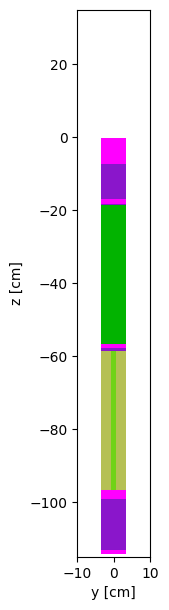

In [17]:
# Plotting control rod

control_universe.plot(width=(20, 150), origin=[0,0,-40], basis='yz', color_by='material', colors={ss304:'fuchsia'})

# Add everything surrounding the reactor

In [18]:
# Create water universe to surround the lattice

all_water_cell = openmc.Cell(fill=water)
outer_universe = openmc.Universe(cells=(all_water_cell,))

In [19]:

# Create surfaces that will divide rings in the circular lattice

ring_radii = np.array([0.0, 8.0, 16.0, 24.0, 32.0, 40.0])
radial_surf = [openmc.ZCylinder(r=r) for r in
               (ring_radii[:-1] + ring_radii[1:])/2]

water_cells = []
for i in range(ring_radii.size):
    # Create annular region
    if i == 0:
        water_region = -radial_surf[i]
    elif i == ring_radii.size - 1:
        water_region = +radial_surf[i-1]
    else:
        water_region = +radial_surf[i-1] & -radial_surf[i]
    water_cells.append(openmc.Cell(fill=water, region=water_region))

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

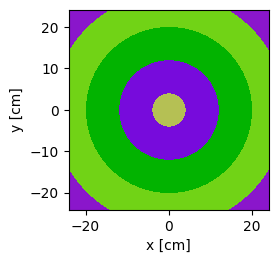

In [20]:
# Plot the rings to visualize the circular lattice, without rods

plot_args = {'width': (2*24.1, 2*24.1)}
bundle_universe = openmc.Universe(cells=water_cells)
bundle_universe.plot(**plot_args)

In [21]:
# Arrange the pins in the circular lattice 

num_pins = [1, 6, 12, 18, 24, 30]
angles = [0, 0, 0, 0, 0, 0]

controlRods = {'numPins'  :[num_pins[1], num_pins[3], num_pins[5]],
               'howLeftFrom3oclock':[4          , 2 ,          0]}

transientRods = {'numPins'  :[num_pins[3], num_pins[2]],
                 'howLeftFrom3oclock':[1          , 0]}

waterRods = {'numPins'  :[num_pins[5], num_pins[2]],
             'howLeftFrom3oclock':[1          , 8]}

def ControlRod(controlRods,n,j):
    for irod in range(len(controlRods['numPins'])): 
        if n   == controlRods['numPins'][irod] and \
           j-1 == controlRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def TransientRod(transientRods,n,j):
    for irod in range(len(transientRods['numPins'])): 
        if n   == transientRods['numPins'][irod] and \
           j-1 == transientRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def WaterRod(waterRods,n,j):
    for irod in range(len(waterRods['numPins'])): 
        if n   == waterRods['numPins'][irod] and \
           j-1 == waterRods['howLeftFrom3oclock'][irod]:
                return True
    return False


for i, (r, n, a) in enumerate(zip(ring_radii, num_pins, angles)):
    
    for j in range(n):
        
        # Determine location of center of pin
        theta = (a + j/n*360.) * np.pi/180.
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        
        pin_boundary = openmc.ZCylinder(x0=x, y0=y, r=clad_outer_radius.r)
        water_cells[i].region &= +pin_boundary
        
        # Create each fuel pin -- note that we explicitly assign an ID so 
        # that we can identify the pin later when looking at tallies
        if ControlRod(controlRods,n,j):
            print('Adding in a control rod...')
            pin = openmc.Cell(fill=control_universe, region=-pin_boundary)
        elif TransientRod(transientRods,n,j):
            print('Adding in a transient rod...')
            pin = openmc.Cell(fill=transient_universe, region=-pin_boundary)
        elif WaterRod(waterRods,n,j):
            print('Adding in a water rod...')
            pin = openmc.Cell(fill=outer_universe, region=-pin_boundary)
        else:
            pin = openmc.Cell(fill=fuel_universe, region=-pin_boundary)
        pin.translation = (x, y, 0)
        pin.id = (i + 1)*100 + j
        bundle_universe.add_cell(pin)

Adding in a control rod...
Adding in a transient rod...
Adding in a water rod...
Adding in a transient rod...
Adding in a control rod...
Adding in a control rod...
Adding in a water rod...


<Axes: xlabel='x [cm]', ylabel='y [cm]'>

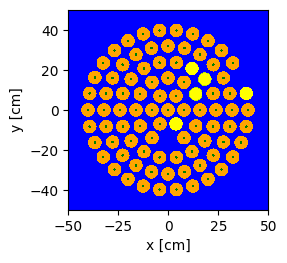

In [22]:
# Plot the rings to visualize the filled circular lattice

# There might be an MCNP model that is published on a TRIGA reactor.
# Zane has the MCNP input, ask him. CC Dr. Munk on that communication.
# Send Dr. Munk a draft of the email before sending it to Zane.
# Possible sensitive information might be the burn up. 
bundle_universe.plot(width=(100, 100), origin=[0,0,-40], 
                   basis='xy', color_by='material',
                   colors={water:'blue',uzrh:'orange',
                   zirconium:'green',graphite:'gray',
                   b4c:'yellow'})

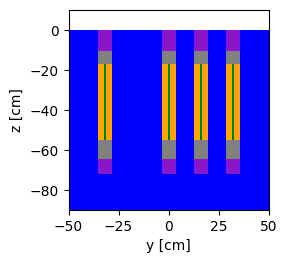

In [23]:
# Geometry definitions for the reactor

reactor_wall = openmc.ZCylinder(r=50.0, boundary_type='vacuum')
reactor_top = openmc.ZPlane(z0=0.0, boundary_type='vacuum')
reactor_bottom = openmc.ZPlane(z0=-114.3, boundary_type='vacuum')
reactor = openmc.Cell()
reactor.region = -reactor_wall & -reactor_top & +reactor_bottom
reactor.fill = bundle_universe
reactor_universe = openmc.Universe(cells=[reactor])

reactor_universe.plot(width=(100, 100), origin=[0,0,-40], 
                   basis='yz', color_by='material',
                   colors={water:'blue',uzrh:'orange',
                   zirconium:'green',graphite:'gray',
                   b4c:'yellow'})

geometry = openmc.Geometry(reactor_universe)
geometry.export_to_xml()

# Run the model

In [24]:
# OpenMC simulation parameters

batches = 100
inactive = 10
particles = 100000

settings_file = openmc.Settings()
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles

bounds = [-28.527375, -28.527375, -28.527375, 28.527375, 28.527375, 28.527375]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
settings_file.source = openmc.Source(space=uniform_dist)

settings_file.export_to_xml()

/usr/local/lib/python3.9/dist-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [25]:
openmc.run(threads=16)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################